In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
%matplotlib inline

In [2]:
U_io = 980e-3
Delta_U_io = U_io*0.003+1e-3
#2 U = 20e-3
#3 U1 = -3.3e-3; U2 = 479e-3; U3 = -498e-3
#4 U_we = 35mV dla 100 i 10
U_we = 35e-3
dU_we = U_we*0.03
print("U_io = {:.3} +/- {:.3}".format(U_io,Delta_U_io))


U_io = 0.98 +/- 0.00394


In [3]:
data = [pd.read_csv(file) for file in ['ku10.csv', 'ku100.csv', 'ku1000.csv']]
nazwy = [r'$|k_u|\sim 20$[dB]',r'$|k_u|\sim 40$[dB]',r'$|k_u|\sim 60$[dB]']

In [4]:
data[0]['Uwy[V]'] = data[0]['Uwy[mV]'] / 1000
data[0]['K_u'] = data[0]['Uwy[V]']/U_we
data[1]['K_u'] = data[1]['Uwy[V]']/U_we


data[2]['Uwe[V]'] = data[2]['Uwe[mV]'] / 1000
data[2]['dUwe[V]'] = data[2]['Uwe[V]']*0.03
data[2]['K_u'] = data[2]['Uwy[V]']/data[2]['Uwe[V]']
data[2] = data[2].sort_values('f[Hz]')

In [5]:
for df in data:
    df['dUwy[V]'] = df['Uwy[V]']*0.03
    df['K_u_log'] = 20 * np.log10(df['K_u'])
    df['dK_u'] = np.sqrt((df['dUwy[V]']/U_we)**2+(df['Uwy[V]']*dU_we/U_we**2)**2)
    df['dK_u_log'] = 20 * df['dK_u'] / np.log(10) / df['K_u']    

In [6]:
data[0]

,f[Hz],Uwy[mV],Uwy[V],K_u,dUwy[V],K_u_log,dK_u,dK_u_log
0,1.0,350,0.350,10.000000,0.01050,20.000000,0.424264,0.368511
1,10.0,350,0.350,10.000000,0.01050,20.000000,0.424264,0.368511
2,100.0,350,0.350,10.000000,0.01050,20.000000,0.424264,0.368511
3,1000.0,350,0.350,10.000000,0.01050,20.000000,0.424264,0.368511
4,10000.0,350,0.350,10.000000,0.01050,20.000000,0.424264,0.368511
5,20000.0,350,0.350,10.000000,0.01050,20.000000,0.424264,0.368511
6,50000.0,320,0.320,9.142857,0.00960,19.221639,0.387899,0.368511
7,100000.0,260,0.260,7.428571,0.00780,17.418106,0.315168,0.368511
8,200000.0,160,0.160,4.571429,0.00480,13.201039,0.193949,0.368511
9,500000.0,64,0.064,1.828571,0.00192,5.242239,0.077580,0.368511


In [7]:
data[1]

,f[Hz],Uwy[V],K_u,dUwy[V],K_u_log,dK_u,dK_u_log
0,1.0,3.500,100.000000,0.10500,40.000000,4.242641,0.368511
1,10.0,3.500,100.000000,0.10500,40.000000,4.242641,0.368511
2,100.0,3.400,97.142857,0.10200,39.748217,4.121422,0.368511
3,1000.0,3.400,97.142857,0.10200,39.748217,4.121422,0.368511
4,2000.0,3.350,95.714286,0.10050,39.619535,4.060813,0.368511
5,5000.0,3.150,90.000000,0.09450,39.084850,3.818377,0.368511
6,10000.0,2.600,74.285714,0.07800,37.418106,3.151676,0.368511
7,20000.0,1.700,48.571429,0.05100,33.727618,2.060711,0.368511
8,100000.0,0.385,11.000000,0.01155,20.827854,0.466690,0.368511
9,1000000.0,0.034,0.971429,0.00102,-0.251783,0.041214,0.368511


In [8]:
data[2]

,f[Hz],Uwy[V],Uwe[mV],Uwe[V],dUwe[V],K_u,dUwy[V],K_u_log,dK_u,dK_u_log
0,1.0,22.500,21,0.021,0.00063,1071.428571,0.67500,60.599264,27.274119,0.221107
1,10.0,22.500,22,0.022,0.00066,1022.727273,0.67500,60.195197,27.274119,0.231636
2,100.0,22.500,22,0.022,0.00066,1022.727273,0.67500,60.195197,27.274119,0.231636
5,200.0,22.500,22,0.022,0.00066,1022.727273,0.67500,60.195197,27.274119,0.231636
3,500.0,22.400,24,0.024,0.00072,933.333333,0.67200,59.400736,27.152900,0.252693
4,1000.0,19.000,25,0.025,0.00075,760.000000,0.57000,57.616272,23.031478,0.263222
6,2000.0,14.000,28,0.028,0.00084,500.000000,0.42000,53.979400,16.970563,0.294809
7,5000.0,7.000,32,0.032,0.00096,218.750000,0.21000,46.798961,8.485281,0.336924
8,50000.0,0.800,34,0.034,0.00102,23.529412,0.02400,27.432221,0.969746,0.357982
9,500000.0,0.072,34,0.034,0.00102,2.117647,0.00216,6.517072,0.087277,0.357982


In [9]:
dolne_granice = [1e5, 1e4, 1e3]
filtrowane_df = []
for df, dolna_granica in zip(data, dolne_granice):
        warunek = df['f[Hz]'] >= dolna_granica
        filtrowane_df.append(df[warunek])
        
punkty_do_prostej = pd.concat(filtrowane_df).sort_values('f[Hz]')
punkty_do_prostej

,K_u,K_u_log,Uwe[V],Uwe[mV],Uwy[V],Uwy[mV],dK_u,dK_u_log,dUwe[V],dUwy[V],f[Hz]
4,760.000000,57.616272,0.025,25.0,19.000,NaN,23.031478,0.263222,0.00075,0.57000,1000.0
6,500.000000,53.979400,0.028,28.0,14.000,NaN,16.970563,0.294809,0.00084,0.42000,2000.0
7,218.750000,46.798961,0.032,32.0,7.000,NaN,8.485281,0.336924,0.00096,0.21000,5000.0
6,74.285714,37.418106,NaN,NaN,2.600,NaN,3.151676,0.368511,NaN,0.07800,10000.0
7,48.571429,33.727618,NaN,NaN,1.700,NaN,2.060711,0.368511,NaN,0.05100,20000.0
8,23.529412,27.432221,0.034,34.0,0.800,NaN,0.969746,0.357982,0.00102,0.02400,50000.0
7,7.428571,17.418106,NaN,NaN,0.260,260.0,0.315168,0.368511,NaN,0.00780,100000.0
8,11.000000,20.827854,NaN,NaN,0.385,NaN,0.466690,0.368511,NaN,0.01155,100000.0
8,4.571429,13.201039,NaN,NaN,0.160,160.0,0.193949,0.368511,NaN,0.00480,200000.0
9,1.828571,5.242239,NaN,NaN,0.064,64.0,0.077580,0.368511,NaN,0.00192,500000.0


In [10]:
wartosci, kowariancje = np.polyfit(np.log10(punkty_do_prostej['f[Hz]']),
                                   punkty_do_prostej['K_u_log'], 1, cov=True) 
bledy = np.diag(kowariancje)**0.5
print(wartosci, bledy)

[ -20.02034049  119.37571966] [ 0.49991562  2.42230335]


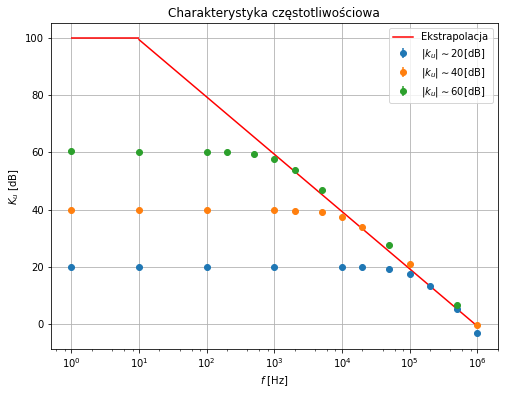

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
for nazwa, df in zip(nazwy, data):
    ax.errorbar(df['f[Hz]'], df['K_u_log'], fmt="o", yerr=df['dK_u_log'], label=nazwa)

ax.plot([10, 1e6],
        np.polyval(wartosci, np.log10(np.array([10, 1e6]))),
        label="Ekstrapolacja",
        color='r',
       )
plt.hlines(100, 1, 10, colors='r')
ax.grid()
ax.set_xscale('log')
ax.set_ylabel('$K_u$ [dB]')
ax.set_xlabel('$f$ [Hz]')
dluga_nazwa = "Ekstrapolowana charakterystyka wzmacniacza operacyjnego z otwartą pętlą sprzężenia zwrotnego"
ax.set_title("Charakterystyka częstotliwościowa")
ax.legend()
fig.savefig("charakterystyka.png", dpi=1000, figsize=(8,6))

In [14]:
R2 = 100e3
R1 = 100
dR2 = R2*0.05
dR1 = R1*0.05
iloraz = R2/R1
diloraz = np.sqrt((dR2/R1)**2+(dR1*R2/R1**2)**2)
U = U_io
dU = Delta_U_io
niepewnosc_ostateczna = np.sqrt((dU/(1+iloraz))**2+(diloraz*U/(1+iloraz)**2)**2)
print(niepewnosc_ostateczna)

6.92699972819e-05


In [19]:
U2 = 479e-3
R = 2e6
dU2 = U2*0.003+1e-3
dR = R2*0.05
I_N = U2/R
dI_N = np.sqrt((dU2/R)**2+(dR*U2/R**2)**2)
print('I_N = ', I_N,' +/- ',dI_N)
U3 = 498e-3
dU3 = U3*0.003+1e-3
I_P = U3/R
dI_P = np.sqrt((dU3/R)**2+(dR*U3/R**2)**2)
print('I_P = ', I_P,' +/- ',dI_P)

I_N =  2.395e-07  +/-  1.20368337718e-08
I_P =  2.49e-07  +/-  1.2512294314e-08


In [17]:
I_B = (I_P+I_N)/2
dI_B = (dI_P + dI_N)/2
print('I_B = ', I_B, '+/-', dI_B)

I_B =  2.4425000000000003e-07 +/- 1.22745640429e-08


In [20]:
U1 = 3.3e-3
dU1 = U1*0.003+0.1e-3
I_io = U1/R
dI_io = np.sqrt((dU1/R)**2+(dR*U1/R**2)**2)
print('I_io = ', I_io, '+/-', dI_io)

I_io =  1.65e-09 +/- 9.91249337957e-11
